# Analysis on Car price dataset (Notebook 1)

## Objectives:
#### `1. Explore the dataset`
#### `2. Preprocess the data for Regression model building`
#### `3. Derive valuable insights, findings and conclusions from the data`

### Note: Read data description file to understand what exactly each feature is describing in the dataset.

### Importation of libraries and dataset


In [43]:
## For mathematical computations
import numpy as np

## For data analysis
import pandas as pd

## For data cleaning
import re

## For data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

## For encoding
from sklearn.preprocessing import LabelEncoder

In [44]:
# Initialisng label encoder
enc = LabelEncoder()

In [45]:
df = pd.read_csv("Engineering_graduate_salary.csv")
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


## Data exploration

In [46]:
df.shape

(2998, 34)

In [47]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [48]:
## Basic data understanding using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [49]:
## Checking for any direct NULL values
df.isna().sum().sum()

0

#### Finding: No directly null values in the dataset.

## Data cleaning

### Removing features that have no impact on the result/ irrelevant for prediction.
##### 1. ID 
##### 2. DOB
##### 3. CollegeID
##### 4. CollegeCityID
##### 5. GraduationYear
##### 6. CollegeState

In [50]:
print("Columns before deletion:", df.shape[1])

df.drop([
    'ID', 'DOB', 'CollegeID', 'CollegeCityID', 'GraduationYear' ,'CollegeState'
], axis = 1, inplace=True)

print("Columns after deletion:", df.shape[1])

Columns before deletion: 34
Columns after deletion: 28


#### 5 irrelevant columns removed.

### Working on 'Gender' column

<Axes: xlabel='Gender', ylabel='count'>

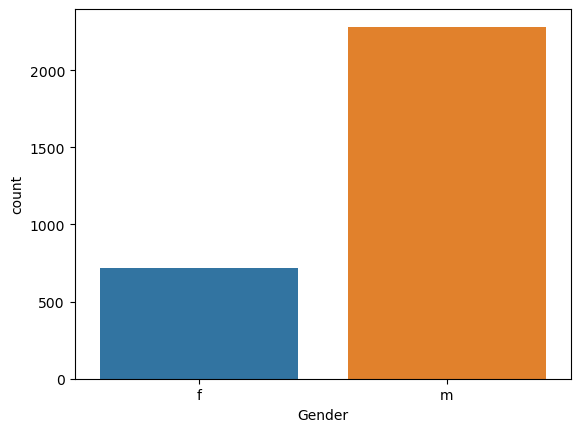

In [51]:
sns.countplot(x = "Gender", data = df)

### Majority of engineers in the dataset are males.

In [52]:
df.Gender.value_counts()

m    2282
f     716
Name: Gender, dtype: int64

In [53]:
# male => 1, female => 0
df.Gender.replace(['m','f'],[1,0], inplace=True)
df.Gender.value_counts()

1    2282
0     716
Name: Gender, dtype: int64

### 10th percentage column


In [54]:
df['10percentage'].describe()

count    2998.000000
mean       77.666264
std        10.002785
min        43.000000
25%        71.140000
50%        78.965000
75%        85.600000
max        97.760000
Name: 10percentage, dtype: float64

<Axes: xlabel='10percentage'>

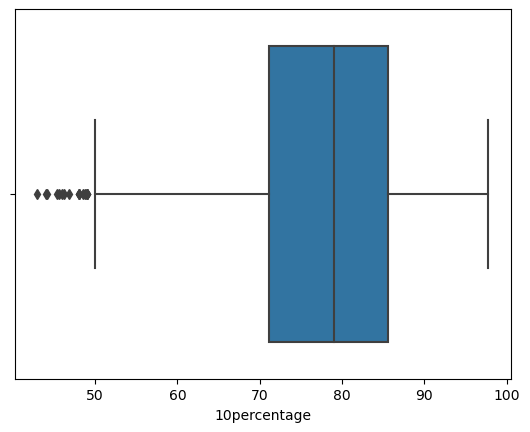

In [55]:
sns.boxplot(x = '10percentage', data = df)

<Axes: xlabel='10percentage', ylabel='Count'>

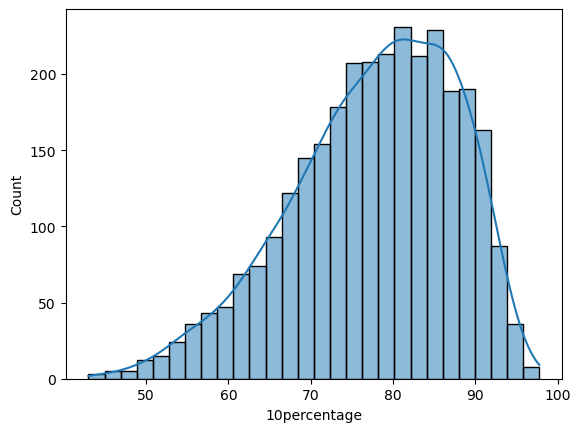

In [56]:
sns.histplot(x = '10percentage', data = df, kde = True)

#### Finding: Majority of canditates have percentages in the range of 70-90

### 10th board column

In [57]:
df['10board'].value_counts()

cbse                            1026
state board                      881
0                                256
icse                             213
ssc                               96
                                ... 
maharashtra state board,pune       1
up board , allahabad               1
mirza ahmed ali baig               1
aurangabad board                   1
karnataka education board          1
Name: 10board, Length: 221, dtype: int64

In [58]:
### Changing all boards with less than 100 occurences into "Others" section

board_counts = df['10board'].value_counts()

# Create a list of board names that occur less than 100
boards_to_combine = board_counts[board_counts < 100].index.tolist()

# Update the "10board" column by replacing the values with "others" if they are in the list
df.loc[df['10board'].isin(boards_to_combine), '10board'] = 'others'

# Verify the updated counts
print(df['10board'].value_counts())

cbse           1026
state board     881
others          622
0               256
icse            213
Name: 10board, dtype: int64


In [59]:
# Applying label encoder on the column
df['10board'] = enc.fit_transform(df['10board'])
df['10board'].value_counts()

1    1026
4     881
3     622
0     256
2     213
Name: 10board, dtype: int64

### 12th Percentage column

In [60]:
df['12percentage'].describe()

count    2998.000000
mean       74.341061
std        11.120299
min        40.000000
25%        66.000000
50%        74.000000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64

<Axes: xlabel='12percentage'>

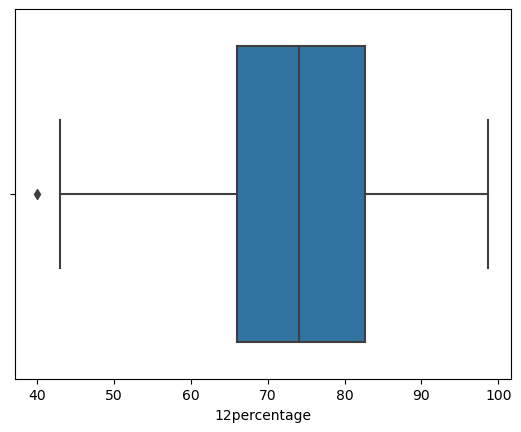

In [61]:
sns.boxplot(x = '12percentage', data = df)

#### Finding: Majority of contestants percentages lie between 65-85 in 12th. Slighly less than performance in 10th.

### 12th board column

In [62]:
df['12board'].value_counts()

cbse                         1039
state board                   948
0                             264
icse                          101
up board                       74
                             ... 
state syllabus                  1
up board,allahabad              1
scte vt orissa                  1
intermideate                    1
karnataka education board       1
Name: 12board, Length: 277, dtype: int64

In [63]:
### Changing all boards with less than 100 occurences into "Others" section

board_counts = df['12board'].value_counts() # A series

# Create a list of board names that occur less than 100
boards_to_combine = board_counts[board_counts < 100].index.tolist()

# Update the "10board" column by replacing the values with "others" if they are in the list
df.loc[df['12board'].isin(boards_to_combine), '12board'] = 'others'

# Verify the updated counts
print(df['12board'].value_counts())

cbse           1039
state board     948
others          646
0               264
icse            101
Name: 12board, dtype: int64


In [64]:
# Label encoding on the feature
df['12board'] = enc.fit_transform(df['12board'])
df['12board'].value_counts()

1    1039
4     948
3     646
0     264
2     101
Name: 12board, dtype: int64

### CollegeTier column

In [65]:
df.CollegeTier.value_counts()

2    2772
1     226
Name: CollegeTier, dtype: int64

In [66]:
df.CollegeTier.replace([2,1],[1,0],inplace=True)
df.CollegeTier.value_counts()

1    2772
0     226
Name: CollegeTier, dtype: int64

### Degree column

<Axes: xlabel='Degree', ylabel='count'>

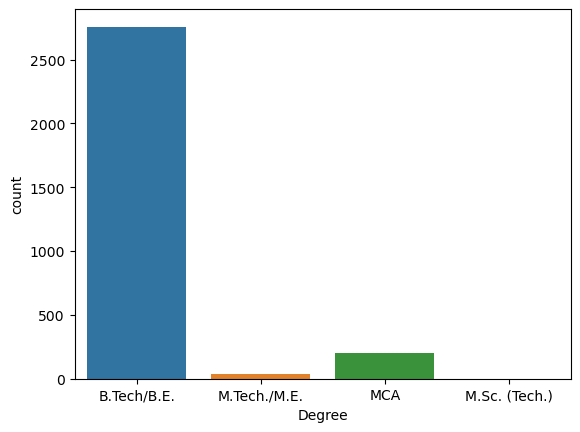

In [67]:
sns.countplot(x = "Degree", data = df)

#### A vast majority of the engineers in the dataset are Bachelors in Technology & Engineering.

In [68]:
df.Degree.value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [69]:
## Grouping non B.Tech into others to avoid model bias that maybe created due to uneven distribution

degree = df['Degree'].value_counts()

# Create a list of board names that occur less than 100
degree_to_combine = degree[degree < 300].index.tolist()

# Update the "10board" column by replacing the values with "others" if they are in the list
df.loc[df['Degree'].isin(degree_to_combine), 'Degree'] = 'others'

# Verify the updated counts
print(df['Degree'].value_counts())

B.Tech/B.E.    2757
others          241
Name: Degree, dtype: int64


In [70]:
df.Degree = enc.fit_transform(df.Degree)
df.Degree.value_counts()

0    2757
1     241
Name: Degree, dtype: int64

### Specialization column

In [71]:
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [72]:
### Grouping value counts below 100 into 'Others'

spec = df['Specialization'].value_counts() 

# Create a list of board names that occur less than 100
spec_to_combine = spec[spec < 100].index.tolist()

# Update the "10board" column by replacing the values with "others" if they are in the list
df.loc[df['Specialization'].isin(spec_to_combine), 'Specialization'] = 'others'

# Verify the updated counts
print(df['Specialization'].value_counts())

electronics and communication engineering    670
computer science & engineering               557
information technology                       506
computer engineering                         415
others                                       346
computer application                         201
mechanical engineering                       155
electronics and electrical engineering       148
Name: Specialization, dtype: int64


#### Large number of the engineers come from a Computer/IT background.

In [73]:
# Label encoding the column
df.Specialization = enc.fit_transform(df.Specialization)
df.Specialization.value_counts()

3    670
2    557
5    506
1    415
7    346
0    201
6    155
4    148
Name: Specialization, dtype: int64

### collegeGPA column

In [74]:
df.collegeGPA.describe()

count    2998.000000
mean       71.509857
std         8.122462
min         6.630000
25%        66.530000
50%        71.800000
75%        76.300000
max        99.930000
Name: collegeGPA, dtype: float64

<Axes: xlabel='collegeGPA'>

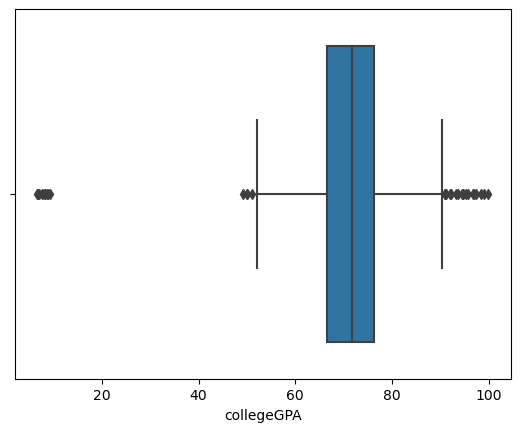

In [75]:
sns.boxplot(x = 'collegeGPA', data = df)

#### Finding: Majority of college GPA around 70 percent.

In [76]:
df.CollegeCityTier.value_counts()

0    2110
1     888
Name: CollegeCityTier, dtype: int64

In [77]:
df.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

## Working on special exam scores (Marking parameters )

####  'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'

In [78]:
df.English.value_counts()

475    122
545    114
535    108
465    107
485     84
      ... 
240      1
870      1
205      1
180      1
255      1
Name: English, Length: 109, dtype: int64

In [79]:
df.English.describe()

count    2998.000000
mean      501.066378
std       105.304512
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

In [80]:
df.head(10)

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,1,2009,84.00,1,0,0,7,73.82,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,1,2010,64.50,1,1,0,2,65.00,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,3,2007,85.17,3,1,0,7,61.94,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,1,2009,86.00,1,0,0,2,80.40,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,1,2008,75.00,1,1,0,7,64.30,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
5,0,83.16,2,2007,77.00,1,0,1,7,99.93,...,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000
6,0,72.50,4,2007,53.20,4,1,0,6,68.00,...,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000
7,0,77.00,4,2009,88.00,4,1,0,2,71.00,...,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000
8,1,76.80,4,2010,87.70,4,1,0,5,73.15,...,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000
9,0,57.00,4,2009,73.00,4,1,0,2,70.08,...,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000


### Visualising AMCAT scores using heatmap

In [81]:
amcat = df[['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]

<Axes: >

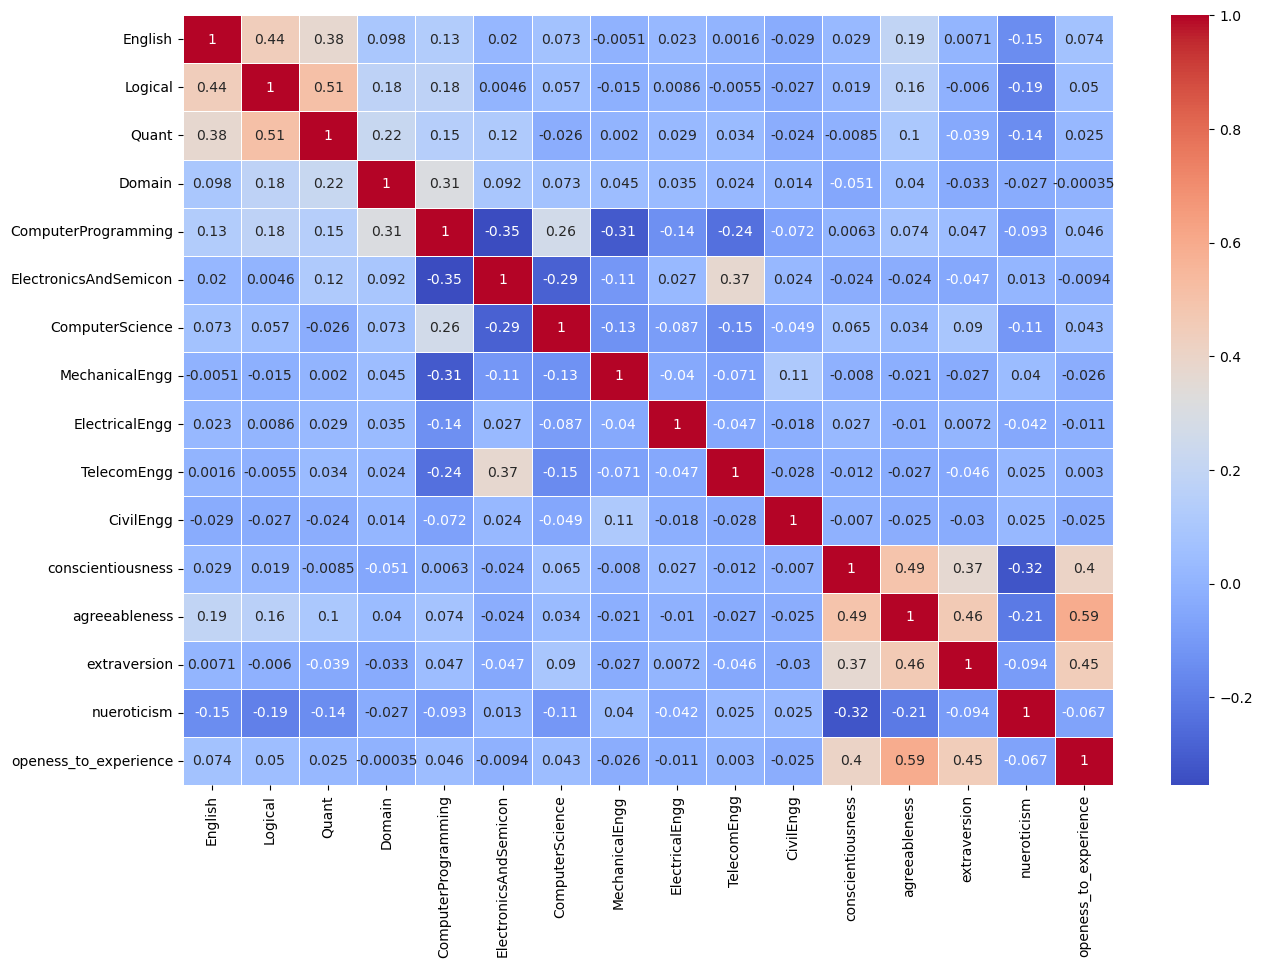

In [82]:
plt.figure(figsize=(15, 10))
sns.heatmap(amcat.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

### Some basic observations:
#### 1. Scores in 'Openess to experience' and 'agreeableness' have moderately strong correlation.
#### 2. 'consciousness' and 'agreeableness' also have moderately strong correlation.
#### 3. Some features also have visible negative correlation although it made be hard to make any assumptions on them yet.

In [83]:
## Checking with info() function one last time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   int64  
 1   10percentage           2998 non-null   float64
 2   10board                2998 non-null   int64  
 3   12graduation           2998 non-null   int64  
 4   12percentage           2998 non-null   float64
 5   12board                2998 non-null   int64  
 6   CollegeTier            2998 non-null   int64  
 7   Degree                 2998 non-null   int64  
 8   Specialization         2998 non-null   int64  
 9   collegeGPA             2998 non-null   float64
 10  CollegeCityTier        2998 non-null   int64  
 11  English                2998 non-null   int64  
 12  Logical                2998 non-null   int64  
 13  Quant                  2998 non-null   int64  
 14  Domain                 2998 non-null   float64
 15  Comp

## Exporting the dataset

In [84]:
df.to_csv("final-dataset.csv")

## Summary
#### 1. Dataset imported and explored.
#### 2. Dropped irrelevant features.
#### 3. Feature handling/ cleaning.
#### 4. Performed label encoding on features for further model training.
#### 5. Visualised features using boxplots, histograms with KDE graphs, heatmaps.
#### 6. Dataset cleaned and ready to be used for Machine Learning model.


## Made by: Hrishikesh Reddy Papasani
### GitHub profile: https://github.com/Hrishikesh-Papasani
### Connect on LinkedIn: https://www.linkedin.com/in/hrishikesh-reddy-papasani-02110725a/